In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201909]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12
66599,201909,15,전자,1510,가전,여성,40대,신혼영유아가구,서울특별시,양천구,목동,955559,14
66600,201909,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,양천구,목동,234707,7
66604,201909,20,여가/스포츠,2011,레저,남성,30대,신혼영유아가구,서울특별시,중랑구,묵동,699976,9
66605,201909,20,여가/스포츠,2012,문화,여성,20대,1인가구,서울특별시,중랑구,묵동,6620798,53
66606,201909,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,중랑구,묵동,772965,17


In [7]:
df_1903_test = df_1903
df_1903_test['1회금액'] = round(df_1903_test['매출금액']/df_1903_test['매출건수'],)
df_1903_test

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,1회금액
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9,44626.0
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17,99326.0
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19,112031.0
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5,19184.0
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12,218445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179346,201909,21,e상품/서비스,2110,o2o서비스,남성,20대,1인가구,서울특별시,중구,남대문로5가,538370,9,59819.0
179347,201909,10,의류,1014,스포츠의류,여성,30대,신혼영유아가구,서울특별시,성북구,동소문동4가,639502,7,91357.0
179348,201909,19,출산/육아,1913,육아용품서비스,여성,30대,1인가구,서울특별시,영등포구,영등포동2가,188057,7,26865.0
179350,201909,19,출산/육아,1913,육아용품서비스,여성,40대,신혼영유아가구,서울특별시,영등포구,영등포동7가,268959,7,38423.0


In [8]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu))

25


In [9]:
big_category = list(set(df_1903['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1903['품목중분류명']))
print(len(middle_category))

13
49


In [10]:
lifestyle = list(set(df_1903['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['1인가구', '노인가구', '성인자녀가구', '초중고자녀가구', '신혼영유아가구']

지역별 매출
송파구     4517
강남구     4389
마포구     4023
영등포구    3714
성북구     3288
은평구     3252
강서구     3087
강동구     3047
성동구     2836
구로구     2695
서대문구    2670
서초구     2658
용산구     2584
동작구     2526
동대문구    2525
광진구     2294
노원구     2233
중랑구     2132
양천구     1689
관악구     1581
종로구     1549
도봉구     1508
강북구     1371
금천구     1191
중구      1172
Name: 고객소재지_시군구, dtype: int64


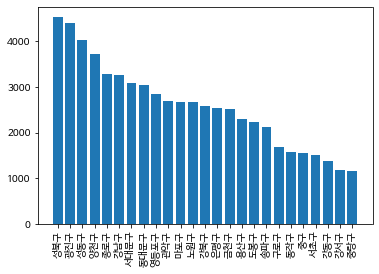

In [11]:
print('지역별 매출')
print(df_1903['고객소재지_시군구'].value_counts())
df_1903_total = df_1903['고객소재지_시군구'].value_counts().tolist()
# print(df_1903_total)

plt.bar(sigoongu, df_1903_total)
plt.xticks(rotation = 90)
plt.show()

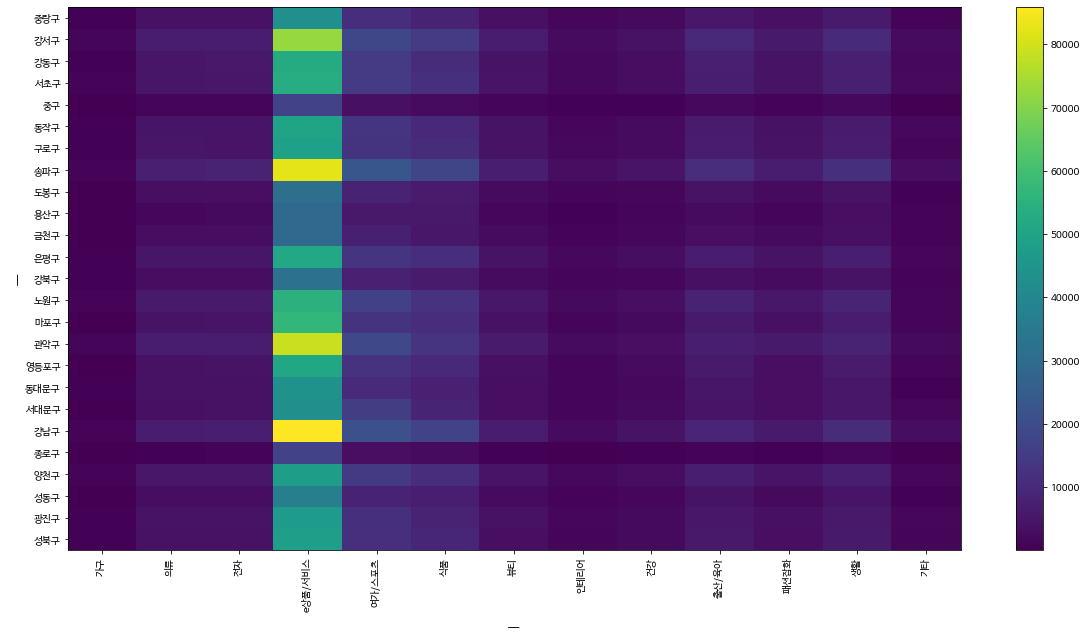

In [12]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [13]:
#  시군구 - 매출건수(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,가구,의류,전자,e상품/서비스,여가/스포츠,식품,뷰티,인테리어,건강,출산/육아,패션잡화,생활,기타
성북구,14.0,16.0,15.0,13.0,16.0,14.0,16.0,15.0,13.0,14.0,18.0,14.0,16.0
광진구,13.0,13.0,14.0,15.0,15.0,16.0,13.0,13.0,15.0,16.0,12.0,16.0,11.0
성동구,22.0,21.0,22.0,19.0,20.0,19.0,20.0,22.0,19.5,19.0,22.0,19.0,23.0
양천구,6.0,6.0,8.0,14.0,9.0,8.0,7.0,6.0,9.0,7.0,6.0,9.0,8.0
종로구,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
강남구,4.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0
서대문구,21.0,18.0,18.0,17.0,6.0,15.0,18.0,16.0,17.0,18.0,16.0,17.0,10.0
동대문구,15.0,17.0,16.0,16.0,18.0,18.0,17.0,18.0,18.0,17.0,15.0,18.0,21.0
영등포구,19.0,14.0,13.0,10.0,14.0,13.0,14.0,17.0,12.0,13.0,17.0,13.0,13.0
관악구,1.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,6.0,4.0,5.0,4.0


In [14]:
# 클러스터링 시도
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[4 4 3 0 1 2 4 4 0 2 0 0 3 0 3 3 3 2 0 0 1 0 0 2 4]


In [15]:
sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id']==3]
temp['cluster_id']

성동구    3
강북구    3
금천구    3
용산구    3
도봉구    3
Name: cluster_id, dtype: int32

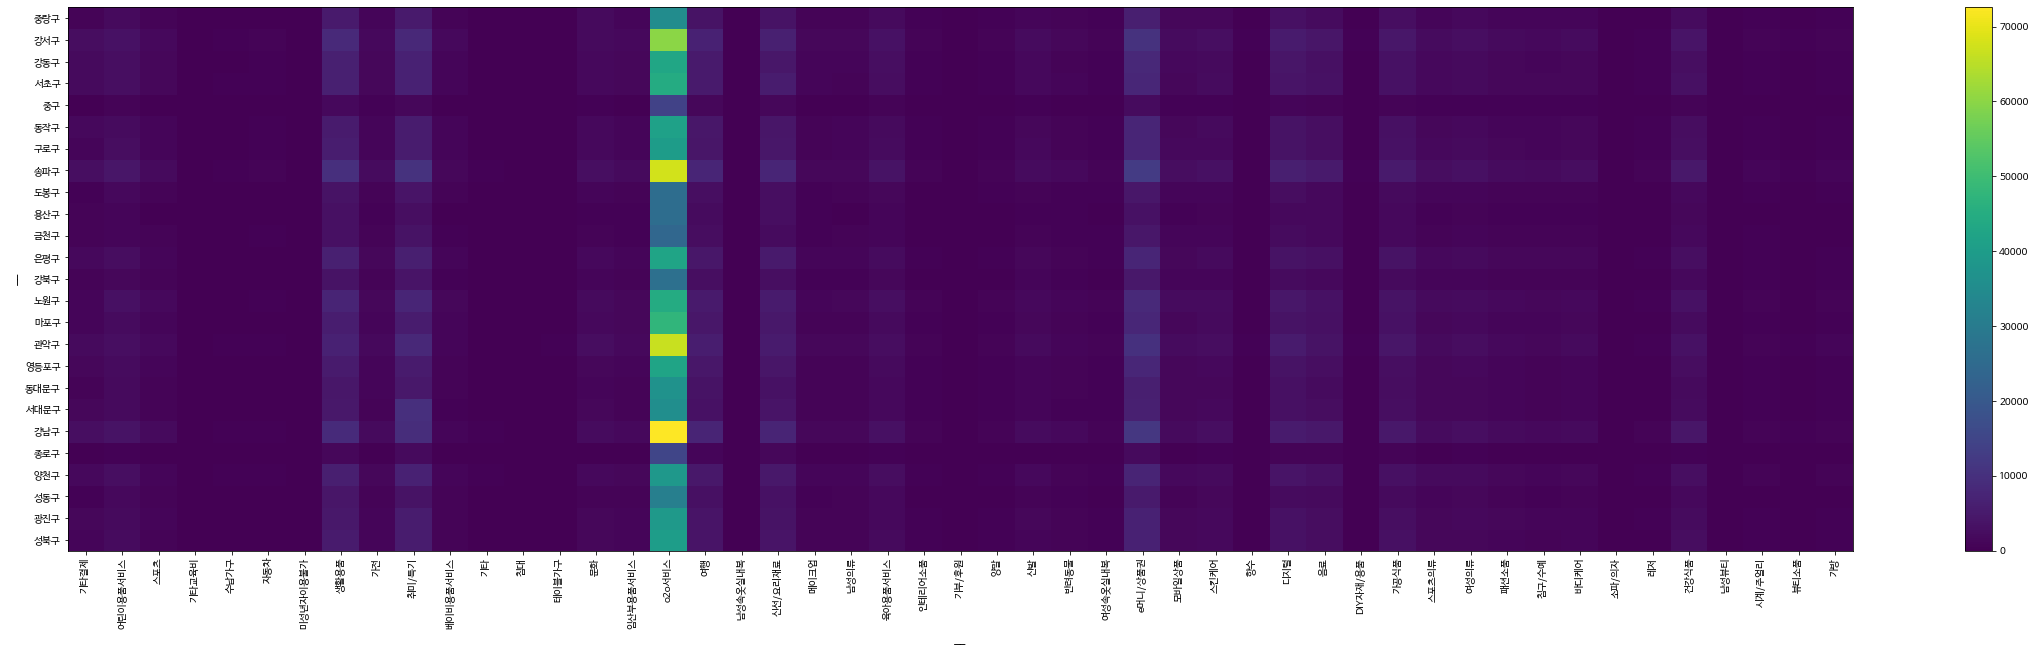

In [16]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [17]:
#  시군구 - 매출건수(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,기타결제,어린이용품서비스,스포츠,기타교육비,수납가구,자동차,미성년자이용불가,생활용품,가전,취미/특기,...,패션소품,침구/수예,바디케어,소파/의자,레저,건강식품,남성뷰티,시계/주얼리,뷰티소품,가방
성북구,16.0,11.0,18.0,15.0,16.0,15.0,17.0,14.0,16.0,15.0,...,15.0,15.0,17.0,20.0,16.0,13.0,16.5,20.0,16.0,19.0
광진구,12.0,15.0,13.0,3.0,13.0,19.0,13.0,16.0,13.0,14.0,...,11.0,13.0,14.0,17.0,12.0,15.0,8.0,14.0,13.0,11.0
성동구,23.0,20.0,15.0,10.0,22.0,21.0,23.0,19.0,22.0,21.0,...,21.0,22.0,21.0,23.0,22.0,19.5,23.5,22.0,19.0,22.0
양천구,9.0,6.0,8.0,5.0,5.0,6.0,6.0,9.0,8.0,8.0,...,7.0,9.0,6.0,8.0,6.0,9.0,14.5,6.0,7.0,6.0
종로구,25.0,25.0,25.0,24.0,25.0,25.0,23.0,25.0,25.0,24.0,...,25.0,25.0,25.0,24.5,25.0,25.0,23.5,25.0,24.0,25.0
강남구,1.0,2.0,2.0,8.0,4.0,3.0,5.0,2.0,2.0,3.0,...,2.0,2.0,3.0,5.0,2.0,2.0,11.0,5.0,1.0,4.0
서대문구,10.0,17.0,19.0,19.0,21.0,22.0,23.0,17.0,18.0,2.0,...,18.0,17.5,16.0,19.0,21.0,17.0,23.5,12.0,18.0,13.0
동대문구,21.0,18.0,16.0,14.0,14.0,14.0,16.0,18.0,14.0,18.0,...,16.0,16.0,18.0,13.0,17.0,18.0,16.5,19.0,15.0,16.0
영등포구,11.0,12.0,11.0,20.0,19.0,13.0,19.5,12.0,15.0,16.0,...,14.0,17.5,15.0,14.5,15.0,12.0,12.5,15.0,17.0,18.0
관악구,5.0,8.0,3.0,1.0,1.0,4.0,1.0,5.0,4.0,4.0,...,4.0,4.0,4.0,1.0,5.0,5.0,1.0,2.0,3.0,1.0


In [18]:
# 클러스터링 시도
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[0 0 2 0 3 1 0 0 4 1 4 4 2 4 2 2 2 1 0 4 3 4 4 1 0]


In [19]:
sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id']==3]
temp['cluster_id']

종로구    3
중구     3
Name: cluster_id, dtype: int32

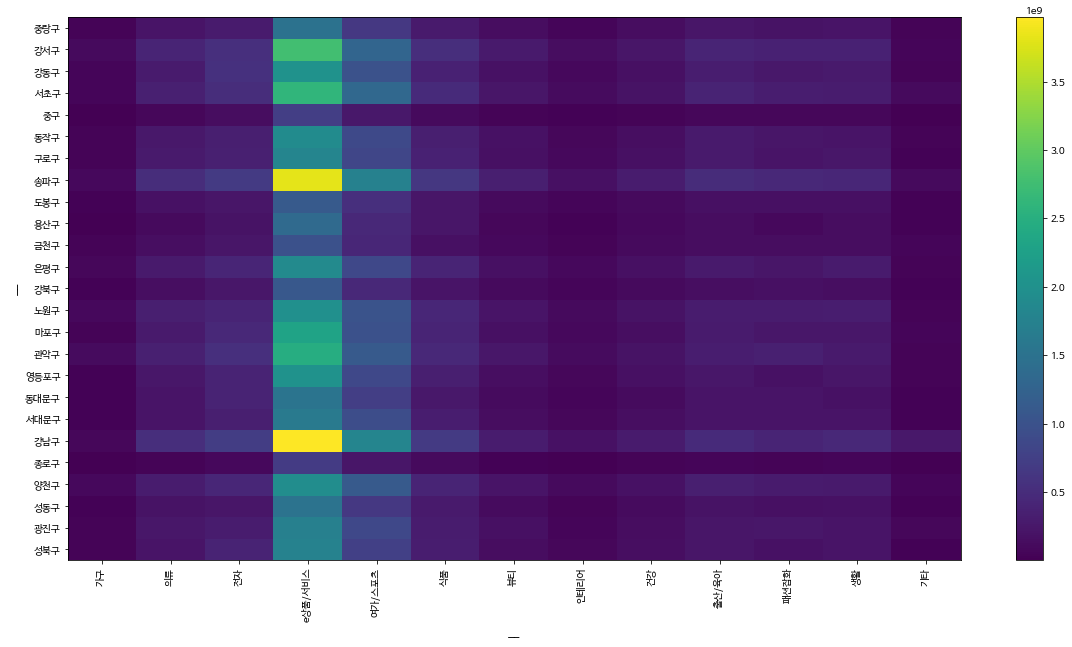

In [20]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [21]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending= False)

,가구,의류,전자,e상품/서비스,여가/스포츠,식품,뷰티,인테리어,건강,출산/육아,패션잡화,생활,기타
성북구,14.0,16.0,11.0,14.0,16.0,15.0,16.0,15.0,12.0,14.0,18.0,16.0,20.0
광진구,11.0,13.0,17.0,15.0,13.0,16.0,13.0,17.0,16.0,15.0,9.0,14.0,4.0
성동구,22.0,19.0,20.0,18.0,19.0,18.0,19.0,22.0,19.0,19.0,20.0,19.0,18.0
양천구,4.0,7.0,8.0,10.0,6.0,7.0,7.0,7.0,7.0,5.0,7.0,8.0,7.0
종로구,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
강남구,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
서대문구,17.0,18.0,15.0,16.0,10.0,14.0,17.0,13.0,15.0,18.0,13.0,17.0,17.0
동대문구,18.0,17.0,13.0,17.0,17.0,19.0,18.0,18.0,18.0,17.0,15.0,18.0,16.0
영등포구,21.0,14.0,12.0,7.0,12.0,13.0,14.0,14.0,10.0,13.0,17.0,12.0,13.0
관악구,1.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,6.0,4.0,7.0,9.0


In [22]:
# 클러스터링 시도
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[1 1 1 4 2 3 1 1 4 0 4 4 2 4 2 2 2 3 1 4 2 0 4 0 1]


In [23]:
sigoongu_money_large['cluster_id'] = kmeans.labels_
temp = sigoongu_money_large[sigoongu_money_large['cluster_id']==3]
temp['cluster_id']

강남구    3
송파구    3
Name: cluster_id, dtype: int32

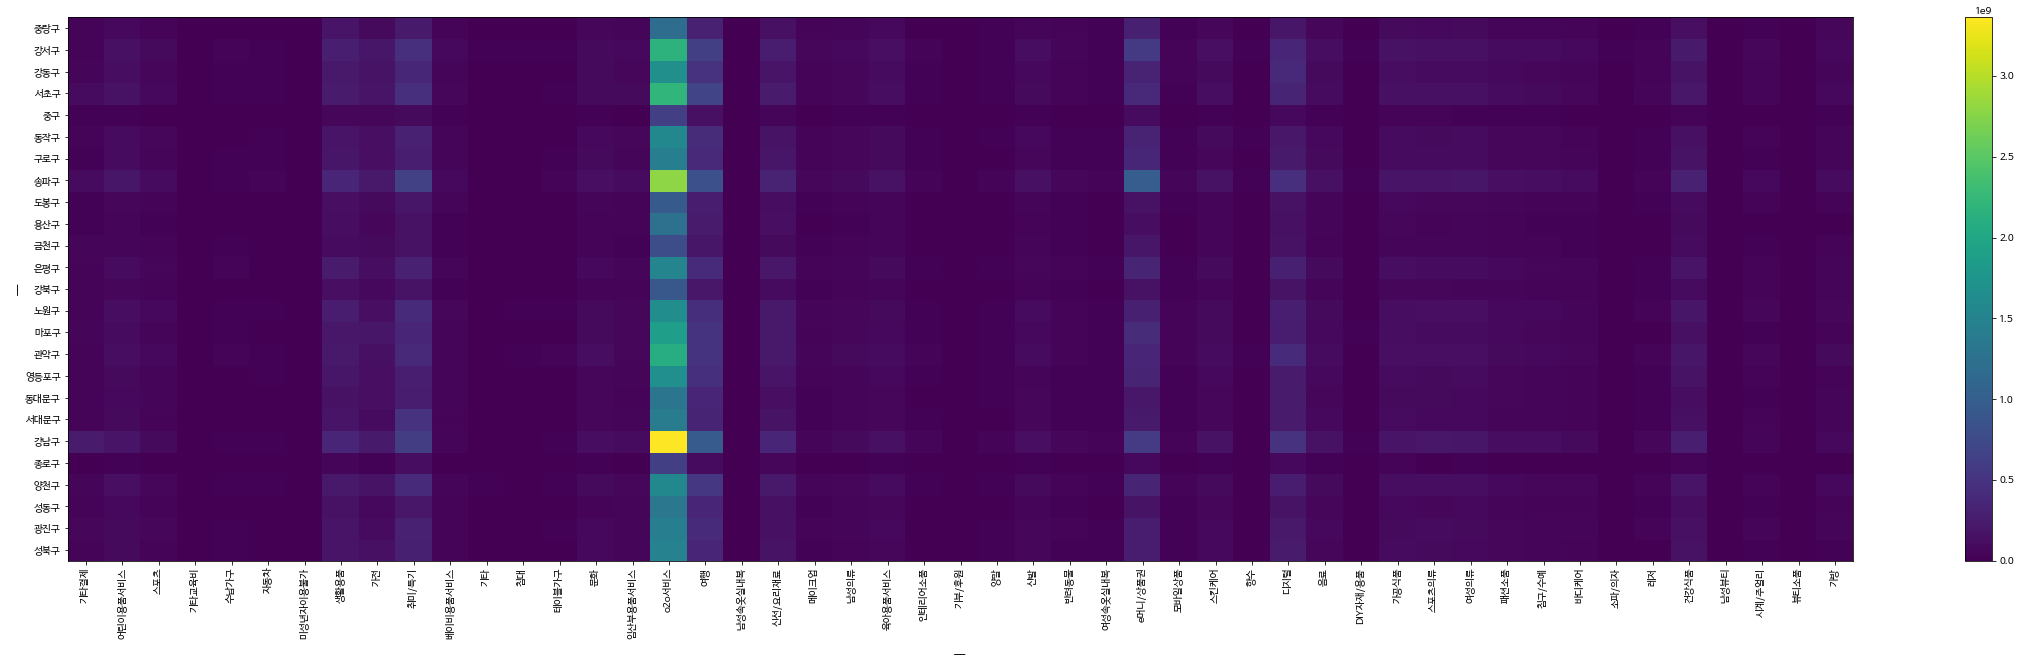

In [24]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [25]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,기타결제,어린이용품서비스,스포츠,기타교육비,수납가구,자동차,미성년자이용불가,생활용품,가전,취미/특기,...,패션소품,침구/수예,바디케어,소파/의자,레저,건강식품,남성뷰티,시계/주얼리,뷰티소품,가방
성북구,18.0,13.0,18.0,19.0,9.0,18.0,16.0,16.0,8.0,14.0,...,13.0,13.0,16.0,21.0,20.0,12.0,17.0,22.0,18.0,22.0
광진구,4.0,15.0,11.0,1.0,11.0,17.0,12.0,17.0,16.0,11.0,...,11.0,17.0,11.0,20.0,7.0,16.0,6.0,6.0,11.0,10.0
성동구,19.0,19.0,17.0,6.0,19.0,21.0,23.0,18.0,22.0,19.0,...,19.0,22.0,18.0,23.0,16.0,19.0,23.5,21.0,20.0,19.0
양천구,7.0,5.0,8.0,10.0,5.0,5.0,8.0,8.0,7.0,6.0,...,10.0,9.0,6.0,4.0,6.0,7.0,11.0,10.0,4.0,5.0
종로구,25.0,25.0,25.0,24.0,25.0,25.0,23.0,25.0,25.0,24.0,...,25.0,25.0,25.0,24.5,25.0,25.0,23.5,25.0,25.0,25.0
강남구,1.0,2.0,2.0,12.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,1.0,2.0,5.0,1.0,2.0,13.0,5.0,1.0,4.0
서대문구,16.0,16.0,19.0,20.0,20.0,22.0,23.0,14.0,17.0,3.0,...,17.0,14.0,17.0,15.0,17.0,15.0,23.5,9.0,16.0,12.0
동대문구,17.0,18.0,15.0,13.0,15.0,16.0,17.0,19.0,10.0,17.0,...,16.0,18.0,20.0,18.0,19.0,18.0,12.0,18.0,19.0,11.0
영등포구,9.0,14.0,13.0,23.0,21.0,11.0,18.0,12.0,11.0,15.0,...,15.0,15.0,15.0,17.0,15.0,10.0,14.0,14.0,15.0,18.0
관악구,15.0,7.0,4.0,2.0,1.0,7.0,1.0,7.0,9.0,8.0,...,5.0,6.0,4.0,2.0,3.0,5.0,1.0,3.0,6.0,2.0


In [26]:
# 클러스터링 시도
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[1 1 1 3 2 4 1 1 3 0 3 3 2 3 2 1 2 4 1 3 2 0 3 0 1]


In [27]:
sigoongu_money_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id']==3]
temp['cluster_id']

양천구     3
영등포구    3
마포구     3
노원구     3
은평구     3
동작구     3
강동구     3
Name: cluster_id, dtype: int32